In [11]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Identify missing values
print(data.isnull().sum())



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


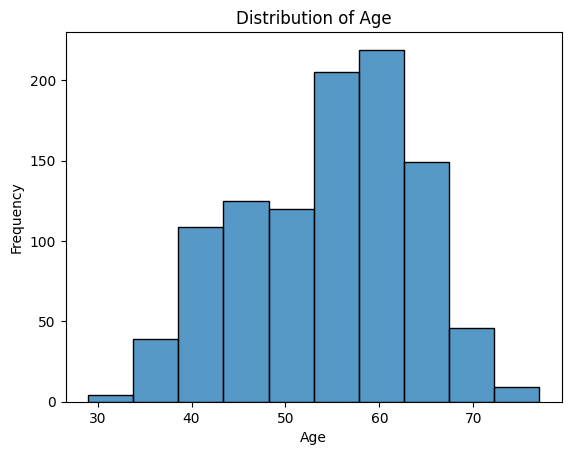

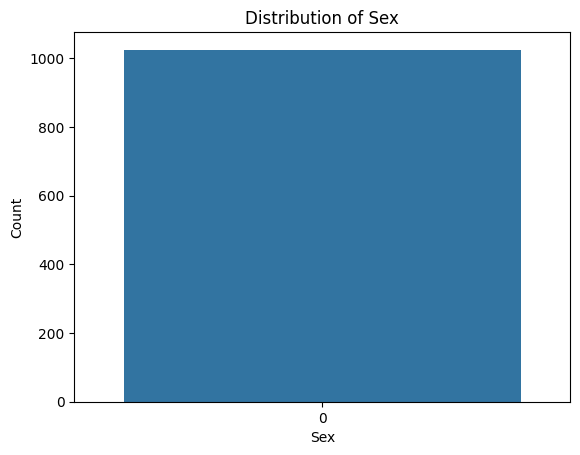

In [8]:
# Plot a histogram for numeric variables
sns.histplot(data['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

# Create bar plots for categorical variables
sns.countplot(data['sex'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()


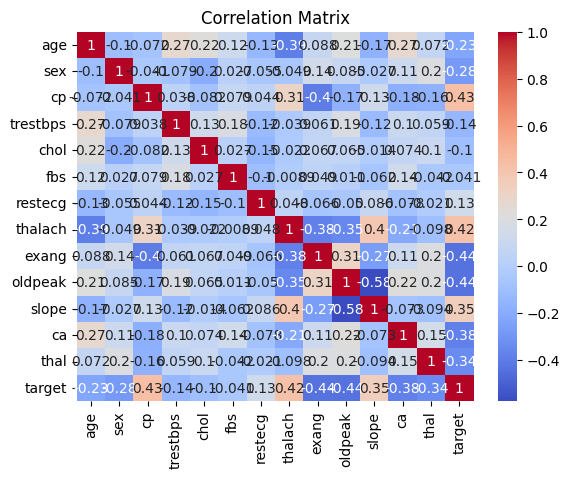

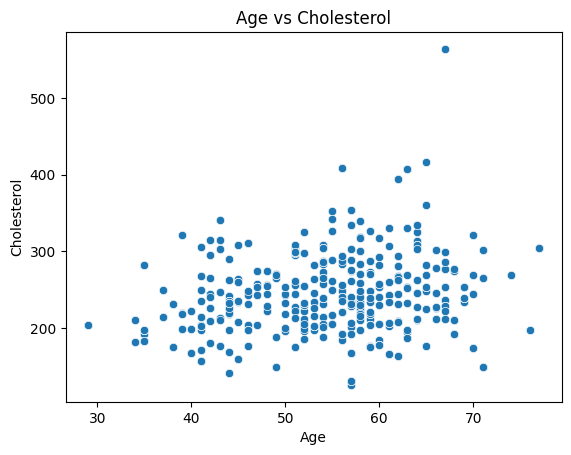

In [9]:
# Plot a correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Plot scatter plots to examine relationships between variables
sns.scatterplot(data=data, x='age', y='chol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol')
plt.show()


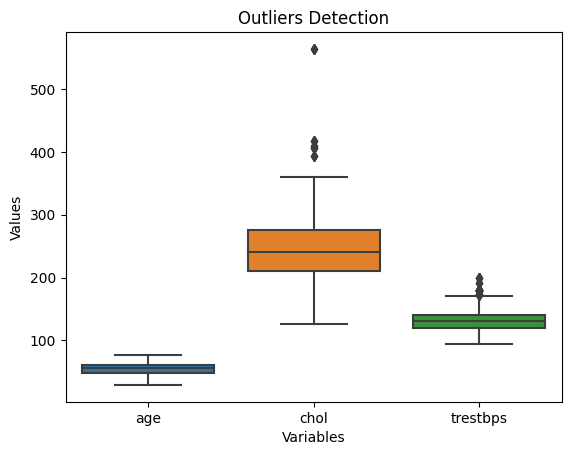

In [10]:
# Create box plots to visualize outliers in numeric variables
sns.boxplot(data=data[['age', 'chol', 'trestbps']])
plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Outliers Detection')
plt.show()


In [13]:

cholesterol_with_heart_disease = data[data['thal'] == 1]['chol']
cholesterol_without_heart_disease = data[data['thal'] == 0]['chol']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(cholesterol_with_heart_disease, cholesterol_without_heart_disease)

# Print the t-statistic and p-value
print('T-statistic:', t_statistic)
print('P-value:', p_value)


T-statistic: 1.1818024879918922
P-value: 0.2413410679739629


In [14]:

# Define significance level
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print('The difference in cholesterol levels between the groups is statistically significant.')
else:
    print('There is no statistically significant difference in cholesterol levels between the groups.')


There is no statistically significant difference in cholesterol levels between the groups.


In [15]:

# Calculate confidence intervals
ci_with_heart_disease = stats.t.interval(0.95, len(cholesterol_with_heart_disease)-1, loc=np.mean(cholesterol_with_heart_disease), scale=stats.sem(cholesterol_with_heart_disease))
ci_without_heart_disease = stats.t.interval(0.95, len(cholesterol_without_heart_disease)-1, loc=np.mean(cholesterol_without_heart_disease), scale=stats.sem(cholesterol_without_heart_disease))

# Print confidence intervals
print('Confidence Interval (with heart disease):', ci_with_heart_disease)
print('Confidence Interval (without heart disease):', ci_without_heart_disease)



Confidence Interval (with heart disease): (217.94979268680842, 239.92520731319158)
Confidence Interval (without heart disease): (203.21064699001266, 215.07506729570161)


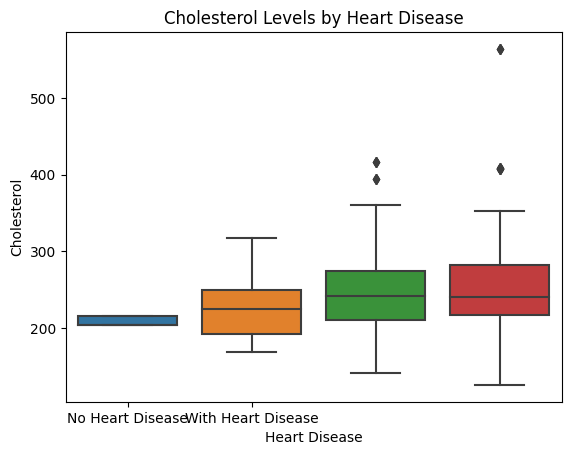

In [18]:
# visualize the cholesterol levels
sns.boxplot(x=data['thal'], y=data['chol'])
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.title('Cholesterol Levels by Heart Disease')
plt.xticks([0, 1], ['No Heart Disease', 'With Heart Disease'])
plt.show()


In [ ]:
#Summary of Findings:

# Hypothesis Test:
#Hypothesis: There is no significant difference in cholesterol levels between patients with and without heart disease.

#Confidence Intervals:
# Confidence intervals were calculated for the cholesterol levels of patients with and without heart disease.
# A narrower interval indicates greater precision.which was confidence level without heart desease

